In [1]:
import pandas as pd
import numpy as np
 
 
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
display(train.head())
display(test.head())
train["Age"].mean()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,200,9,125,74,0,0,28.536910,0.444902,45,1
1,3832,4,109,80,0,0,28.047673,0.238243,22,0
2,4927,4,88,78,39,0,52.371341,0.279471,26,0
3,4088,9,125,74,0,0,40.062688,0.203922,45,0
4,3644,5,107,78,44,284,52.935068,0.284959,45,1


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,398,0,126,80,0,0,40.096264,0.822517,21
1,3833,3,88,60,20,0,39.810590,0.204331,22
2,4836,3,114,76,0,0,33.198760,0.521011,21
3,4572,1,146,74,0,0,26.890259,0.504950,38
4,636,1,123,90,26,140,40.270088,0.800513,28


28.932

In [3]:
test_shape = test.shape
train_shape = train.shape
 
print(test_shape)
print(train_shape)

(2000, 9)
(3000, 10)


In [4]:
display(train.describe())
display(test.describe())

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2492.964667,3.557000,113.733667,68.743667,11.164000,11.663333,35.262073,0.400476,28.932000,0.239000
std,1447.218078,3.032131,20.885612,16.332755,14.351159,45.064090,7.568025,0.274666,8.469078,0.426544
min,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000775,0.145844,21.000000,0.000000
25%,1218.750000,1.000000,100.000000,64.000000,0.000000,0.000000,32.301920,0.230987,22.000000,0.000000
50%,2465.500000,3.000000,111.000000,70.000000,0.000000,0.000000,33.835873,0.268674,26.000000,0.000000
75%,3750.250000,6.000000,125.000000,78.000000,24.000000,0.000000,39.578256,0.506778,33.000000,0.000000
max,4999.000000,13.000000,196.000000,110.000000,49.000000,579.000000,53.400629,2.302072,67.000000,1.000000


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,2000.000000,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2509.303000,3.584000,114.29350,68.76650,11.204000,11.859000,35.474703,0.401755,29.075500
std,1438.260835,3.053786,21.98925,16.17482,14.056037,49.826253,7.387314,0.267051,8.571729
min,1.000000,0.000000,57.00000,0.00000,0.000000,0.000000,0.000929,0.137377,21.000000
25%,1284.750000,1.000000,100.00000,64.00000,0.000000,0.000000,32.581209,0.234628,22.000000
50%,2549.500000,3.000000,111.00000,70.00000,0.000000,0.000000,33.814634,0.271275,26.000000
75%,3743.750000,6.000000,125.00000,78.00000,24.250000,0.000000,39.694403,0.506439,33.000000
max,4995.000000,13.000000,199.00000,110.00000,52.000000,744.000000,52.960258,2.175784,67.000000


In [5]:
def kesson_table(df): 
        null_val = df.isnull().sum()
        percent = 100 * df.isnull().sum()/len(df)
        kesson_table = pd.concat([null_val, percent], axis=1)
        kesson_table_ren_columns = kesson_table.rename(
        columns = {0 : '欠損数', 1 : '%'})
        return kesson_table_ren_columns
 
display(kesson_table(train))
display(kesson_table(test))
 

,欠損数,%
index,0,0.0
Pregnancies,0,0.0
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0
Outcome,0,0.0


,欠損数,%
index,0,0.0
Pregnancies,0,0.0
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0


In [6]:
# scikit-learnのインポートをします
from sklearn import tree

In [7]:
# 「train」の目的変数と説明変数の値を取得
target = train["Outcome"].values
features_one = train[['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']].values
 
# 決定木の作成
my_tree_one = tree.DecisionTreeClassifier()
result = my_tree_one
my_tree_one = my_tree_one.fit(features_one, target)

 
# 「test」の説明変数の値を取得
test_features = test[['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']].values
 
# 「test」の説明変数を使って「my_tree_one」のモデルで予測
my_prediction = my_tree_one.predict(test_features)
result.score(features_one,target)

1.0

In [8]:
# 予測データのサイズを確認
display(my_prediction.shape)

#予測データの中身を確認
print(my_prediction)

(2000,)

[1 0 0 ... 1 0 0]


In [9]:
# PassengerIdを取得
index = np.array(test["index"]).astype(int)
 
# my_prediction(予測データ）とPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame({'index': index, 'Y': my_prediction})
# my_tree_one.csvとして書き出し
my_solution.to_csv("my_tree_one_v3.csv",header=False,index=False)
 
 

In [10]:
# ライブラリのインポート
## データ加工・可視化系ライブラリ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font='IPAexGothic')

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2492.964667,3.557000,113.733667,68.743667,11.164000,11.663333,35.262073,0.400476,28.932000,0.239000
std,1447.218078,3.032131,20.885612,16.332755,14.351159,45.064090,7.568025,0.274666,8.469078,0.426544
min,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000775,0.145844,21.000000,0.000000
25%,1218.750000,1.000000,100.000000,64.000000,0.000000,0.000000,32.301920,0.230987,22.000000,0.000000
50%,2465.500000,3.000000,111.000000,70.000000,0.000000,0.000000,33.835873,0.268674,26.000000,0.000000
75%,3750.250000,6.000000,125.000000,78.000000,24.000000,0.000000,39.578256,0.506778,33.000000,0.000000
max,4999.000000,13.000000,196.000000,110.000000,49.000000,579.000000,53.400629,2.302072,67.000000,1.000000


['index', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
[0, 5, 10, 15, 20, 25]


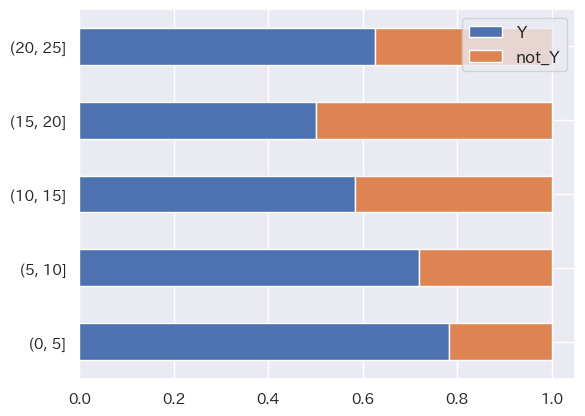

In [11]:
colums=list(train.columns)
#display(train.head())
display(train.describe())

print(colums)
df = train
df0= df[df['Outcome']==0]
df1= df[df['Outcome']==1]
bins = list(range(0,30,5))
print(bins)
s0 = pd.cut(df0['DiabetesPedigreeFunction']*10, bins).value_counts().sort_index()
s1 = pd.cut(df1['DiabetesPedigreeFunction']*10, bins).value_counts().sort_index()
dfx = pd.DataFrame({'Y':s0, 'not_Y':s1})
dfx = dfx.assign( **{'全体': lambda p: p.sum(axis=1)} )
#display(dfx)
from matplotlib.font_manager import FontProperties
fp= FontProperties(fname='ipaexg.ttf', size=12);
t = dfx.apply( lambda p: p/p[-1] , axis=1 )
#display(t)
col = ["Y","not_Y"] 
t[col].plot.barh(stacked=True)
plt.legend(col,prop=fp)
plt.show()

In [12]:
train.corr().style.background_gradient(axis=None)

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
index,1.000000,0.003418,0.036222,0.024221,-0.005473,0.004264,-0.022387,0.027093,0.015610,0.010270
Pregnancies,0.003418,1.000000,0.067360,-0.008811,0.003640,-0.034456,0.011715,-0.027216,0.421213,0.197909
Glucose,0.036222,0.067360,1.000000,0.007822,0.022918,0.010135,0.013754,0.053021,0.035148,0.064677
BloodPressure,0.024221,-0.008811,0.007822,1.000000,0.042476,0.040159,0.242601,0.098362,0.023235,0.051347
SkinThickness,-0.005473,0.003640,0.022918,0.042476,1.000000,0.167506,0.092715,0.141789,0.028481,0.001112
Insulin,0.004264,-0.034456,0.010135,0.040159,0.167506,1.000000,0.168287,0.219013,0.047494,0.079457
BMI,-0.022387,0.011715,0.013754,0.242601,0.092715,0.168287,1.000000,0.067524,0.082661,0.244350
DiabetesPedigreeFunction,0.027093,-0.027216,0.053021,0.098362,0.141789,0.219013,0.067524,1.000000,0.072471,0.099075
Age,0.015610,0.421213,0.035148,0.023235,0.028481,0.047494,0.082661,0.072471,1.000000,0.266000
Outcome,0.010270,0.197909,0.064677,0.051347,0.001112,0.079457,0.244350,0.099075,0.266000,1.000000
